<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/brady/TALLER/EVALUACION/ALVAREZ_ERICK_EVA_PARTE01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

# Cargar datasets
df1 = pd.read_csv('index_1.csv')
df2 = pd.read_csv('index_2.csv')

# Unir los datasets en uno solo
df = pd.concat([df1, df2], ignore_index=True)

# Verificar las primeras filas
print(df.head())

# Verificar dimensiones y columnas
print(f"\nDimensiones del DataFrame combinado: {df.shape}")
print(f"\nColumnas: {df.columns.tolist()}")


         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  

Dimensiones del DataFrame combinado: (3898, 6)

Columnas: ['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name']


**informacion general del dataset**

In [10]:
# Tipo de datos y valores nulos
print("📌 Info general del DataFrame:\n")
print(df.info())

print("\n📌 Valores nulos por columna:\n")
print(df.isnull().sum())

print("\n📌 Estadísticas generales:\n")
print(df.describe())


📌 Info general del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3898 non-null   object 
 1   datetime     3898 non-null   object 
 2   cash_type    3898 non-null   object 
 3   card         3547 non-null   object 
 4   money        3898 non-null   float64
 5   coffee_name  3898 non-null   object 
dtypes: float64(1), object(5)
memory usage: 182.8+ KB
None

📌 Valores nulos por columna:

date             0
datetime         0
cash_type        0
card           351
money            0
coffee_name      0
dtype: int64

📌 Estadísticas generales:

            money
count  3898.00000
mean     31.38060
std       5.06461
min      15.00000
25%      27.92000
50%      32.82000
75%      35.76000
max      40.00000


**Frecuencia de ventas por tipo de café**

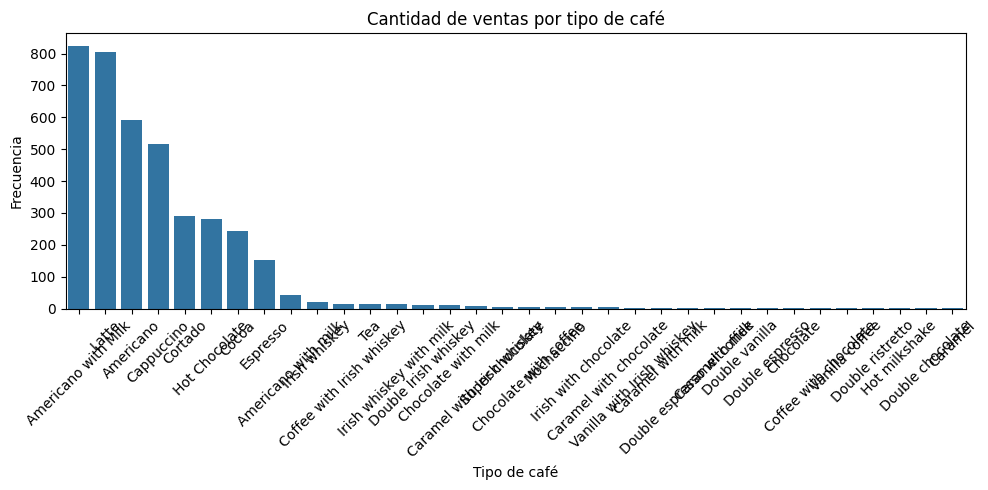

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index)
plt.title("Cantidad de ventas por tipo de café")
plt.xlabel("Tipo de café")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Distribución de ingresos**

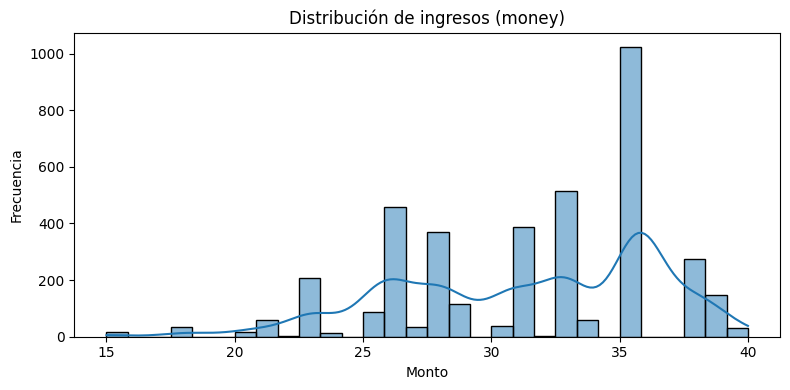

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df['money'], kde=True, bins=30)
plt.title("Distribución de ingresos (money)")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


**Ventas por hora del día**

In [14]:
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed', errors='coerce')


In [15]:
print(df['datetime'].isnull().sum())  # cuántos valores no se pudieron convertir


0


In [16]:
print(df[df['datetime'].isnull()][['datetime']])


Empty DataFrame
Columns: [datetime]
Index: []


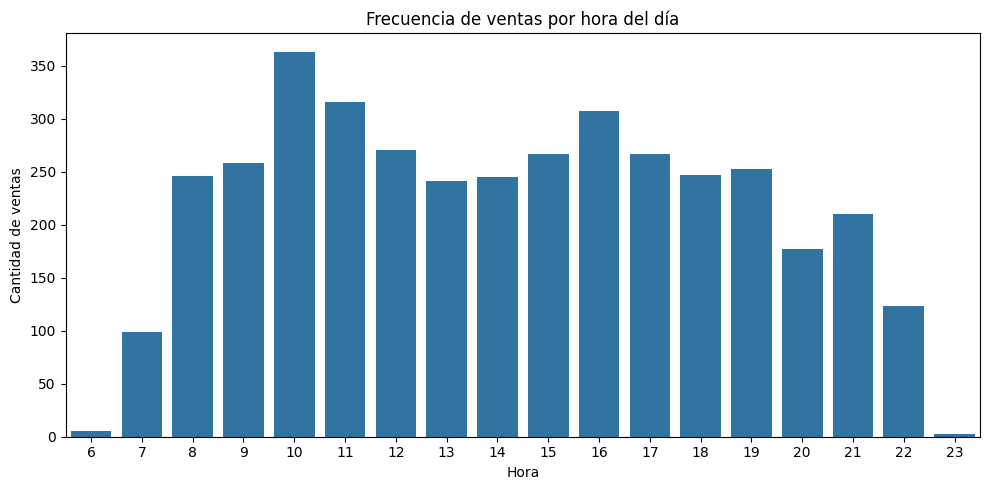

In [17]:
df['hora'] = df['datetime'].dt.hour

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='hora')
plt.title("Frecuencia de ventas por hora del día")
plt.xlabel("Hora")
plt.ylabel("Cantidad de ventas")
plt.tight_layout()
plt.show()


**Ingenieria de caracteristicas**

In [19]:
# === 1. Extraer mes, día de la semana y hora ===
df['mes'] = df['datetime'].dt.month
df['dia_semana'] = df['datetime'].dt.dayofweek  # 0 = lunes, 6 = domingo
df['hora'] = df['datetime'].dt.hour

# === 2. Crear columna 'cantidad_total_vendida_no_dia' ===
df['fecha'] = df['datetime'].dt.date  # solo la fecha sin hora
ventas_por_dia = df.groupby('fecha')['money'].sum().reset_index(name='cantidad_total_vendida_no_dia')

# Unir al DataFrame original
df = df.merge(ventas_por_dia, on='fecha', how='left')

# === 3. Codificar variables categóricas ===
df_encoded = pd.get_dummies(df, columns=['coffee_name', 'cash_type'], drop_first=True)

# Verificar las nuevas columnas
print("\n✅ Columnas después de la codificación:")
print(df_encoded.columns.tolist())



✅ Columnas después de la codificación:
['date', 'datetime', 'card', 'money', 'hora', 'mes', 'dia_semana', 'fecha', 'cantidad_total_vendida_no_dia', 'coffee_name_Americano with Milk', 'coffee_name_Americano with milk', 'coffee_name_Cappuccino', 'coffee_name_Caramel', 'coffee_name_Caramel coffee', 'coffee_name_Caramel with Irish whiskey', 'coffee_name_Caramel with chocolate', 'coffee_name_Caramel with milk', 'coffee_name_Chocolate', 'coffee_name_Chocolate with coffee', 'coffee_name_Chocolate with milk', 'coffee_name_Cocoa', 'coffee_name_Coffee with Irish whiskey', 'coffee_name_Coffee with chocolate', 'coffee_name_Cortado', 'coffee_name_Double Irish whiskey', 'coffee_name_Double chocolate', 'coffee_name_Double espresso', 'coffee_name_Double espresso with milk', 'coffee_name_Double ristretto', 'coffee_name_Double vanilla', 'coffee_name_Espresso', 'coffee_name_Hot Chocolate', 'coffee_name_Hot milkshake', 'coffee_name_Irish whiskey', 'coffee_name_Irish whiskey with milk', 'coffee_name_Irish

**División de Datos en Entrenamiento y Prueba**

In [20]:
from sklearn.model_selection import train_test_split

# === 1. Selección de variables ===
# Eliminamos columnas que no son predictoras o se derivan directamente de la variable objetivo
columnas_a_excluir = ['datetime', 'fecha', 'money', 'cantidad_total_vendida_no_dia', 'card']  # card = campo irrelevante para predicción
X = df_encoded.drop(columns=columnas_a_excluir)

# Variable objetivo
y = df_encoded['cantidad_total_vendida_no_dia']

# === 2. División del dataset ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# === 3. Mostrar tamaños ===
print(f"📊 Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"📊 Tamaño del conjunto de prueba: {X_test.shape}")


📊 Tamaño del conjunto de entrenamiento: (3118, 38)
📊 Tamaño del conjunto de prueba: (780, 38)


## Modelado Predictivo (con TensorFlow Keras)

**Escalamiento de variables (StandardScaler)**

In [22]:
# Verificar tipos de datos
print(X_train.dtypes)

# Mostrar columnas con tipo "object" (textuales)
print("\nColumnas no numéricas:")
print(X_train.select_dtypes(include='object').columns)


date                                      object
hora                                       int32
mes                                        int32
dia_semana                                 int32
coffee_name_Americano with Milk             bool
coffee_name_Americano with milk             bool
coffee_name_Cappuccino                      bool
coffee_name_Caramel                         bool
coffee_name_Caramel coffee                  bool
coffee_name_Caramel with Irish whiskey      bool
coffee_name_Caramel with chocolate          bool
coffee_name_Caramel with milk               bool
coffee_name_Chocolate                       bool
coffee_name_Chocolate with coffee           bool
coffee_name_Chocolate with milk             bool
coffee_name_Cocoa                           bool
coffee_name_Coffee with Irish whiskey       bool
coffee_name_Coffee with chocolate           bool
coffee_name_Cortado                         bool
coffee_name_Double Irish whiskey            bool
coffee_name_Double c

In [23]:
# Eliminar columnas no numéricas antes de escalar
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64', 'uint8'])  # excluye texto
X_test_numeric = X_test.select_dtypes(include=['int64', 'float64', 'uint8'])


In [26]:
print(X_train.dtypes)


date                                      object
hora                                       int32
mes                                        int32
dia_semana                                 int32
coffee_name_Americano with Milk             bool
coffee_name_Americano with milk             bool
coffee_name_Cappuccino                      bool
coffee_name_Caramel                         bool
coffee_name_Caramel coffee                  bool
coffee_name_Caramel with Irish whiskey      bool
coffee_name_Caramel with chocolate          bool
coffee_name_Caramel with milk               bool
coffee_name_Chocolate                       bool
coffee_name_Chocolate with coffee           bool
coffee_name_Chocolate with milk             bool
coffee_name_Cocoa                           bool
coffee_name_Coffee with Irish whiskey       bool
coffee_name_Coffee with chocolate           bool
coffee_name_Cortado                         bool
coffee_name_Double Irish whiskey            bool
coffee_name_Double c

In [27]:
# Copia segura de X_train eliminando columnas problemáticas (texto, fecha)
columnas_a_excluir = ['datetime', 'fecha', 'card']
X_train_numeric = X_train.drop(columns=columnas_a_excluir, errors='ignore')
X_test_numeric = X_test.drop(columns=columnas_a_excluir, errors='ignore')

# Elimina columnas tipo object (texto)
X_train_numeric = X_train_numeric.select_dtypes(include=['number'])
X_test_numeric = X_test_numeric.select_dtypes(include=['number'])


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)


In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Modelo secuencial simple
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Salida para regresión
])

# Compilar modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [30]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 227975.7812 - mae: 430.2184 - val_loss: 226298.3906 - val_mae: 426.9529
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 210574.1406 - mae: 412.9287 - val_loss: 204863.2656 - val_mae: 401.3188
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 188940.2969 - mae: 384.2203 - val_loss: 153075.1094 - val_mae: 333.8421
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 134074.1406 - mae: 308.0971 - val_loss: 87605.9141 - val_mae: 232.0739
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69574.2578 - mae: 204.7626 - val_loss: 49087.1289 - val_mae: 175.7035
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43447.8086 - mae: 163.6471 - val_loss: 41515.3242 - val_mae: 168.7821
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41193.9805 - mae: 162.9483 - val_loss: 40966.2930 - val_mae: 168.7266
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38186.3594 - mae: 158.4771 - val_loss: 

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones
y_pred = model.predict(X_test_scaled).flatten()

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📈 MAE: {mae:.2f}")
print(f"📈 MSE: {mse:.2f}")
print(f"📈 RMSE: {rmse:.2f}")
print(f"📈 R²: {r2:.2f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
📈 MAE: 166.99
📈 MSE: 40029.56
📈 RMSE: 200.07
📈 R²: 0.14


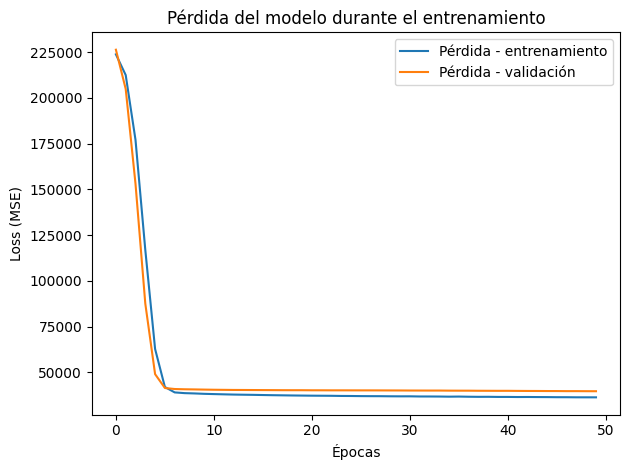

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida - entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida - validación')
plt.title('Pérdida del modelo durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.tight_layout()
plt.show()


**Modelo para predecir la cantidad vendida por tipo de café**

In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# === 1. Preparar X e Y multi-output desde el DataFrame codificado ===
# Filtrar columnas predictoras (eliminar columnas no numéricas y no útiles)
X_full = df_encoded.drop(columns=['datetime', 'fecha', 'money', 'card', 'cantidad_total_vendida_no_dia'], errors='ignore')
X_full_numeric = X_full.select_dtypes(include=['number'])

# Crear salida Y multi-output: columnas dummy de coffee_name * money
y_multi = df_encoded.filter(like='coffee_name_').copy()
for col in y_multi.columns:
    y_multi[col] = df_encoded[col] * df_encoded['money']

# === 2. Dividir en entrenamiento y prueba ===
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(
    X_full_numeric, y_multi, test_size=0.2, random_state=42
)

# === 3. Escalar X ===
scaler_multi = StandardScaler()
X_multi_train_scaled = scaler_multi.fit_transform(X_multi_train)
X_multi_test_scaled = scaler_multi.transform(X_multi_test)

# === 4. Construir modelo Keras multi-output ===
model_multi = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_multi_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(y_multi.shape[1])  # una salida por cada tipo de café
])

model_multi.compile(optimizer='adam', loss='mse', metrics=['mae'])

# === 5. Entrenar el modelo ===
history_multi = model_multi.fit(
    X_multi_train_scaled, y_multi_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# === 6. Evaluar modelo por tipo de café ===
y_multi_pred = model_multi.predict(X_multi_test_scaled)

print("\n📊 Evaluación por tipo de café:")
for i, col in enumerate(y_multi.columns):
    mse = mean_squared_error(y_multi_test[col], y_multi_pred[:, i])
    r2 = r2_score(y_multi_test[col], y_multi_pred[:, i])
    print(f"☕ {col}: MSE = {mse:.2f} | R² = {r2:.2f}")


Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 26.2169 - mae: 1.0004 - val_loss: 23.1671 - val_mae: 1.4325
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.6768 - mae: 1.4646 - val_loss: 23.0433 - val_mae: 1.4308
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.3403 - mae: 1.4313 - val_loss: 22.9974 - val_mae: 1.4155
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.1972 - mae: 1.4196 - val_loss: 22.9861 - val_mae: 1.4190
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.7908 - mae: 1.3977 - val_loss: 22.9816 - val_mae: 1.4224
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.6372 - mae: 1.4408 - val_loss: 22.9565 - val_mae: 1.4055
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.6456 - mae: 1.4334 - val_loss: 22.9322 - val_mae: 1.4115
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.9123 - mae: 1.4085 - val_loss: 22.9415 - val_mae: 1.4150
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

## Serialización del Modelo

**guardar el/los modelo/s entrenado/s de Keras (en formato .h5 o SavedModel) y los pre-procesadores (escaladores, codificadores de scikit-learn) utilizando pickle o joblib.**

In [44]:
model.save('modelo_cafe_multioutput.keras')


In [45]:
from tensorflow.keras.models import load_model

modelo = load_model('modelo_cafe_multioutput.keras')


In [46]:
model_multi.save('modelo_cafe_multioutput.keras')
